## Event file Header information ##

Header information is stored internally in aanet, in a class called Head,
in a way that derives directly from the ascii (.evt) event files. 


In [2]:
import ROOT
import aa
f = EventFile("../evtfiles/numu_jgandalf.root")

print f.header 
    

start_run:  1
PDF: 4      58
XSecFile:  
can:  -479.9 545.21 1327.95
coord_origin:  0 0 479.9 
cut_in:  0 0 0 0
cut_nu:  100 1e+07 -1 1
cut_primary:  0 0 0 0
cut_seamuon:  0 0 0 0
detector:  /pi1/data/shanidze/km3net/TDR/DETECTORS/km3net_wpd_V2.det
drawing: Volume
genhencut:  3000 0
genvol:  -22772.9 3161.5 26837.2 5.868e+13 2e+08
kcut: 2
livetime:  0 0
model: 1       2       1       1      10
muon_desc_file:  
norma:  0 0
nuflux: 0       2       0 0.500E+00 0.000E+00 0.200E+01 0.800E+01
physics:  GENHEN 5.02-280602 110117 1754
seed: GENHEN 3       1000 309408948         0
simul:     
spectrum:  -1.4
target:  isoscalar
end_event:



The for statement loops over all the events in the file. EventFile::index counts the events, which is usefull since we only want to process a few events here. 
Of course, we can do much more complicated things in the event loop.


The following exmple makes a plot of the energy of the neutrino, for all events that have a total ToT of 100000, for an E^-2 neutrino spectrum

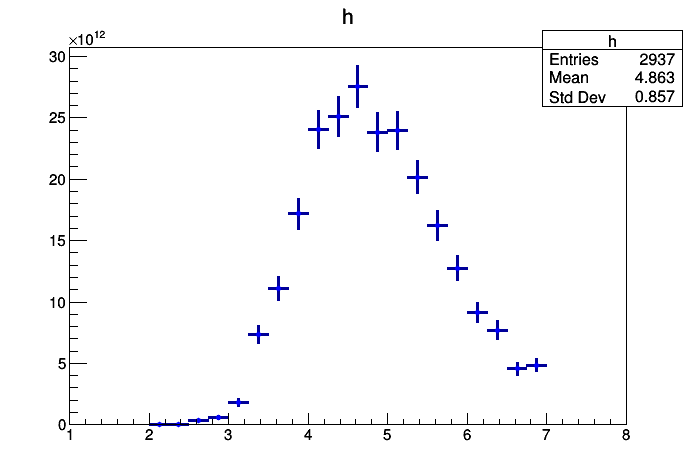

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [3]:
h = TH1D("h","h",28,1,8)

for event in f :
    
    if event.mc_hits.size() < 100 : continue        
    h.Fill( log10(event.mc_trks[0].E) ,event.w[1] * event.mc_trks[0].E**-2 )
        
h.Draw()
ROOT.gPad.Draw()        
